In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder



In [87]:
train= pd.read_csv('../data/train.csv', index_col='no')
test= pd.read_csv('../data/test.csv' ,index_col='no')

In [88]:
#'workclass', 'education', 'marital-status', 'occupation',
 #      'relationship', 'race', 'sex', 'native-country'],
  #    dtype='object'

In [89]:
# object type columns
# temp =train.columns[train.dtypes=='object']

# label Encoding
# le = LabelEncoding()
# for i in temp:
#     le.fit(train[i])
#     train[i] =le.transform(train[i])

### 상관 관계 분석
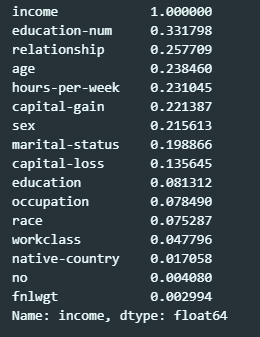

#### education-num || education

In [90]:
# 값 확인
train['education-num'].unique()

array([ 7, 10, 13, 11,  5,  9, 14,  3, 15,  8,  6, 12, 16,  4,  2,  1],
      dtype=int64)

In [91]:
# 개수 확인
train['education-num'].value_counts()

9     9435
10    6558
13    4848
14    1587
11    1230
7     1057
12     980
6      816
4      574
15     500
5      430
8      415
16     347
3      334
2      148
1       46
Name: education-num, dtype: int64

In [92]:
# education 확인
train['education'].unique()

array([' 11th', ' Some-college', ' Bachelors', ' Assoc-voc', ' 9th',
       ' HS-grad', ' Masters', ' 5th-6th', ' Prof-school', ' 12th',
       ' 10th', ' Assoc-acdm', ' Doctorate', ' 7th-8th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [93]:
train['education'].value_counts()

# HS-grad         9435 : 고졸
# Some-college    6558 : 대학
# Bachelors       4848 : 학사
# Masters         1587 : 석사
# Assoc-voc       1230 : 
# 11th            1057 : 
# Assoc-acdm       980 : 
# 10th             816 : 
# 7th-8th          574 : 
# Prof-school      500 : 
# 9th              430 : 
# 12th             415 : 
# Doctorate        347 : 박사
# 5th-6th          334 : 
# 1st-4th          148 : 
# Preschool         46 : 

 HS-grad         9435
 Some-college    6558
 Bachelors       4848
 Masters         1587
 Assoc-voc       1230
 11th            1057
 Assoc-acdm       980
 10th             816
 7th-8th          574
 Prof-school      500
 9th              430
 12th             415
 Doctorate        347
 5th-6th          334
 1st-4th          148
 Preschool         46
Name: education, dtype: int64

In [94]:
edu_dict={
    " Preschool":"level0",
    " 1st-4th":"level1",
    " 5th-6th":"level1",
    " 7th-8th":"level1",
    " 9th":"level1",
    " 10th":"level2",
    " 11th":"level2",
    " 12th":"level2",
    " HS-grad":"level2",
    " Some-collge":"level3",
    " Bachelors":"level3",
    " Assoc-voc":"level3",
    " Assoc-acdm":"level3",
    " Masters":"level3",
    " Prof-school":"level3",
    " Doctorate":"level3",
}

In [95]:
edu_title=[
    " Preschool",
    " 1st-4th",
    " 5th-6th",
    " 7th-8th",
    " 9th",
    " 10th",
    " 11th",
    " 12th",
    " HS-grad",
    " Some-college",
    " Bachelors",
    " Assoc-voc",
    " Assoc-acdm",
    " Masters",
    " Prof-school",
    " Doctorate",
]

cvt_title = ['level0']+['level1']*4+['level2']*4 +['level3']*7

In [96]:
title_dict = dict(zip(edu_title, cvt_title))
train['education'] = train['education'].map(title_dict)

In [115]:
title_dict = dict(zip(edu_title, cvt_title))
test['education'] = test['education'].map(title_dict)

In [97]:
train['education'].value_counts()

level3    16050
level2    11723
level1     1486
level0       46
Name: education, dtype: int64

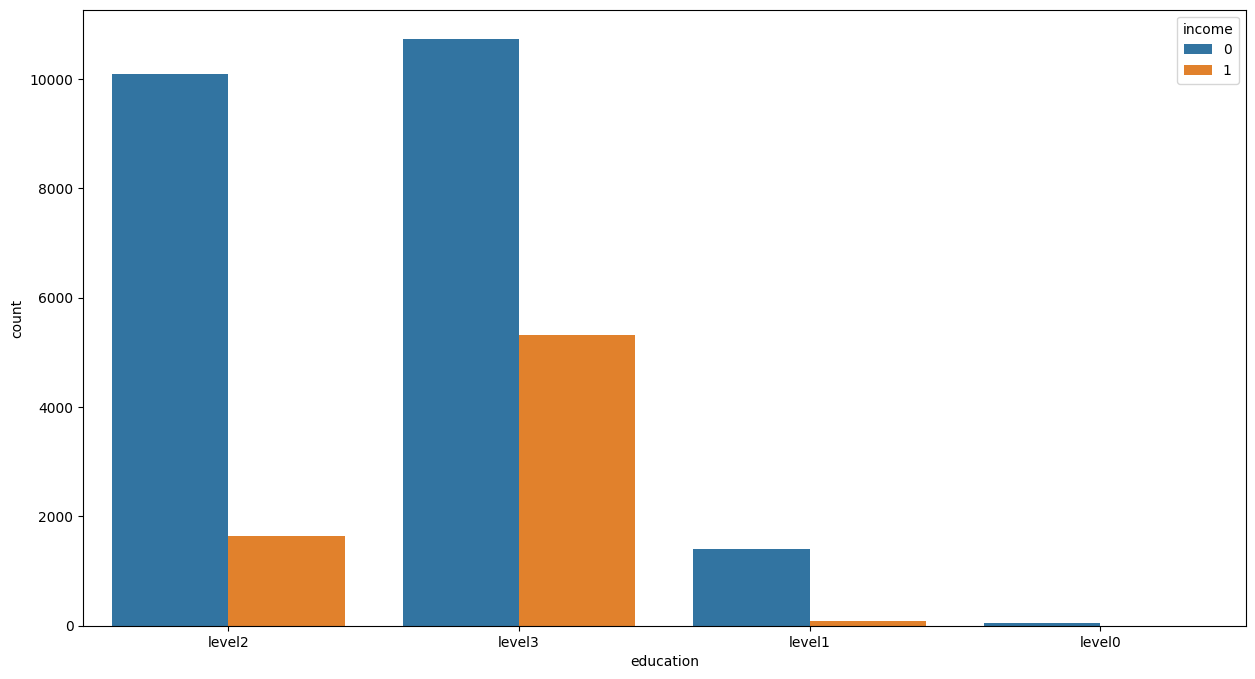

In [98]:
plt.figure(figsize=(15,8))
sns.countplot(train, x='education', hue='income')
plt.show()

In [101]:
train['education-num']

no
1         7
2        10
3        13
4        11
5        10
         ..
29301     9
29302     9
29303     6
29304     7
29305     9
Name: education-num, Length: 29305, dtype: int64

In [114]:
train[train['education-num']==9]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
8,70,Self-emp-not-inc,165586,level2,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,0
10,33,Private,192644,level2,9,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,35,Puerto-Rico,0
28,33,Private,126950,level2,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,0
30,18,Private,332125,level2,9,Never-married,Machine-op-inspct,Other-relative,White,Male,2176,0,25,United-States,0
33,66,Private,217198,level2,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,10,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29295,28,Private,65078,level2,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,1
29298,28,Self-emp-not-inc,183151,level2,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,1
29301,20,Private,100605,level2,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0


In [119]:
train.drop('education-num', axis=1, inplace=True)

In [120]:
X_train = train.drop("income", axis=1)
y_train = train['income']



In [122]:
X_train = pd.get_dummies(X_train)


In [125]:
test = pd.get_dummies(test)

In [128]:
set(X_train.columns)-set(test.columns)


set()

In [127]:
test['native-country_ Holand-Netherlands']=0

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=5)


In [133]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=5)

In [135]:
test = test[X_train.columns]

In [137]:
pre = rf.predict(test)

In [141]:
submit = pd.read_csv("../data/sample_submission.csv", index_col='no')
submit['income']=pre

In [142]:
submit.to_csv("./23_04_21.csv")

In [146]:
from sklearn.model_selection import cross_val_score


In [147]:
cross_val_score(rf, X_train,y_train,cv=5)

array([0.84507763, 0.85480293, 0.84541887, 0.84695444, 0.84593073])

In [154]:
from sklearn.model_selection import GridSearchCV

# 튜닝할 매개변수 정의 하기, 경우의 수를 입력

params = {
    'n_estimators':[50,70,100,130],
    'max_depth':[3,5,7,9,11],
    'max_leaf_nodes':range(2,8),
    'min_samples_split':[3,5,7,9,11]
}
# 임의의 모델 설정
model = RandomForestClassifier(random_state=5)

# 그리드 서치 객체 생성
grid = GridSearchCV(model, params, cv=5, scoring='accuracy')

# 그리드 서치 실행(학습한다.), 매개변수가 많을 수록 시간이 오래 걸릴 수 있음
# 학습용 데이터 활용
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_leaf_nodes': range(2, 8),
                         'min_samples_split': [3, 5, 7, 9, 11],
                         'n_estimators': [50, 70, 100, 130]},
             scoring='accuracy')

In [155]:
print("최대 성능 : " ,grid.best_score_)
print("최대 성능일 때의 파라미터 조합 : ", grid.best_params_)

최대 성능 :  0.824535062276062
최대 성능일 때의 파라미터 조합 :  {'max_depth': 7, 'max_leaf_nodes': 7, 'min_samples_split': 3, 'n_estimators': 100}


In [153]:
rf_best = RandomForestClassifier(max_depth=5, max_leaf_nodes=6, min_samples_split=3, n_estimators=50)

cross_val_score(rf_best, X_train, y_train, cv=5)
#array([0.79730421, 0.80907695, 0.80668828, 0.79901041, 0.79730421])

array([0.79730421, 0.80907695, 0.80668828, 0.79901041, 0.79730421])

In [ ]:
{'max_depth': 7, 'max_leaf_nodes': 7, 'min_samples_split': 3, 'n_estimators': 100}